In [1]:
# Especifando o problema das hidros no pymoo

import numpy as np
from pymoo.core.problem import Problem





class ProblemaHidro(Problem):
    

    
    def __init__(self):
        """
            x[0] -> t1
            x[1] -> t2
            x[2] -> t3
            x[3] -> x1
            x[4] -> x2
            x[5] -> x3    
        """
        lb = np.array([0,0,0,
                       0,0,0])
    
        ub = np.array([1000,1000,1000,
                       800,1000,1000]) # 0 <=x1<=800
        super().__init__(n_var=6, #numero de variaveis
                         n_obj=1, #numero de objetivos
                         n_ieq_constr=7, #numero de restricoes de ineq
                         xl=lb, #lower bound de x
                         xu=ub) #uppper bound de x        

    def _evaluate(self, x, out, *args, **kwargs):
        #v0=500
        #obs x1 -> x[6]; x2 -> x[7] ; x3 -> x[8]
        
        #0.2*(t1 + t2 +t3) + 0.005*(|v1 - v0| + |v2 - v1| + |v3 - v2|)
        f1 = 0.2*(x[:,0]+x[:,1]+x[:,2]) +  0.005* abs(500-x[:,3])+ abs(800-x[:,4])+ abs(200-x[:,5])
        
        out["F"] = [f1]  # 'F' armazena função objetivo
        
        
        
         #restrições de inigualdade de demanda
        # 1.1*x1 + t1 >= 900;
        req1 = -1.1*x[:,3] - x[:,0] + 900
        
        #1.1*x2 + t2 >= 1000;
        req2 = -1.1*x[:,4] - x[:,1] + 1000;
        
        #1.1*x3 + t3 >= 950;
        req3 =  -1.1*x[:,5] - x[:,2] + 950;
        
        #800 - x1 - x2 <= 0
        req4 =  800-x[:,3] - x[:,4]
        
        # x1+x2-1600 <=0
        req5 =  x[:,3]+x[:,4]-1600
        
        #- x1-x2-x3 + 1000<=  0
        req6 =  -x[:,3]-x[:,4]-x[:,5]+1000
        
        # x1+x2+x3  - 1800 <= 0
        req7 = x[:,3]+x[:,4]+x[:,5]-1800
        
        
        out["G"] = [req1,req2, req3,req4,req5,req6,req7] # 'G' restricões ineq
        #out["G"] = np.column_stack([req1,req2, req3,
        #                            req4,req5,req6,req7]) # 'G' restricões ineq
        
        
      
        
        


meuproblema = ProblemaHidro()

In [2]:
%%time

from pymoo.algorithms.soo.nonconvex.pso import PSO
from pymoo.optimize import minimize

from pymoo.termination import get_termination


pso = PSO()
termination = get_termination("time", "00:00:03")
res = minimize(meuproblema,
               pso,
               seed=333,
#               verbose=True,
               termination=termination,
                pop_size=25,
              save_history=True)

print("Best solution found: \nX = %s\nF = %s" % (res.X, res.F))

print(f'''
            t1 -> {res.X[0]} 
            t2 -> {res.X[1]} 
            t3 -> {res.X[2]} 
            x1 -> {res.X[3]} 
            x2 -> {res.X[4]} 
            x3 -> {res.X[5]} ''')


Best solution found: 
X = [ 20.00000451 120.00000175 730.00000041 799.99999718 799.99999996
 199.99999982]
F = [175.50000154]

            t1 -> 20.000004511292406 
            t2 -> 120.00000175105357 
            t3 -> 730.000000411518 
            x1 -> 799.9999971770716 
            x2 -> 799.999999961554 
            x3 -> 199.9999998204131 
CPU times: user 3.59 s, sys: 703 ms, total: 4.29 s
Wall time: 3.34 s


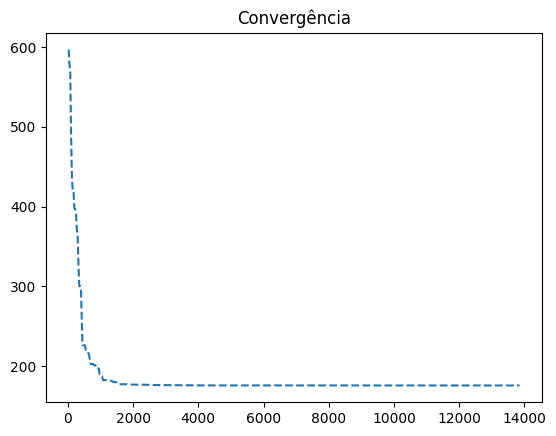

13850

In [3]:
import numpy as np
import matplotlib.pyplot as plt

n_evals = np.array([e.evaluator.n_eval for e in res.history])
opt = np.array([e.opt[0].F for e in res.history])

plt.title("Convergência")
plt.plot(n_evals, opt, "--")
#plt.yscale("log")
plt.show()
max(n_evals)

In [4]:
# verficando restricoes

r = dict()
r['t1'] = res.X[0]
r['t2']     = res.X[1]
r['t3']  = res.X[2] 
r['x1'] = res.X[3] 
r['x2'] =res.X[4] 
r['x3'] =res.X[5]

print(1.1*r['x1'] + r['t1']) # >= 900;
print(1.1*r['x2'] + r['t2'])  #  >= 1000;
print(1.1*r['x3'] + r['t3'])  # >=950;



900.0000014060713
1000.000001708763
950.0000002139725
